# EDA for Enhanced Molecular Data


## Labeled Data

In [41]:
# Cell 1: Import libraries and load labeled data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the enhanced molecular data
df_labeled = pd.read_csv('../../data/raw/enhanced_data/drug_discovery/labeled_features.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df_labeled.shape}")
df_labeled.head()

Dataset loaded successfully!
Shape: (234, 40)


,smiles,FDA_APPROVED,CT_TOX,canonical_smiles,MolWt,LogP,NumHDonors,NumHAcceptors,NumRotatableBonds,NumAromaticRings,...,HallKierAlpha,NumSaturatedCarbocycles,NumAromaticCarbocycles,NumSaturatedHeterocycles,NumAromaticHeterocycles,fr_NH2,fr_COO,fr_benzene,fr_furan,fr_halogen
0,Cc1cc2c(cc1C)n(c-3nc(=O)[nH]c(=O)c3n2)C[C@@H](...,1,0,Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(C[C@H](O)[C@H](O)...,376.369,-1.72356,5.0,9.0,5.0,1.0,...,-2.66,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,CCC1=CN=C(C=C1)CCOC2=CC=C(C=C2)CC3C(=O)NC(=O)S3,0,1,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,356.447,3.15960,1.0,5.0,7.0,2.0,...,-2.34,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,CC(C)[C@]1(CC(=NO1)C2=NC=CC3=CC=CC=C32)C(=O)N[...,0,1,CC(C)[C@@]1(C(=O)N[C@H]2CC(=O)O[C@]2(O)CF)CC(c...,415.421,1.84380,2.0,7.0,5.0,2.0,...,-3.07,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,CCCCCOc1ccc(cc1)c2ccc(cc2)c3ccc(cc3)C(=O)N[C@H...,1,0,CCCCCOc1ccc(-c2ccc(-c3ccc(C(=O)N[C@H]4C[C@@H](...,1140.254,-0.92710,14.0,17.0,14.0,4.0,...,-7.55,0.0,4.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0
4,CCC(=O)N(c1ccccc1)C2CC[NH+](CC2)CCc3ccccc3,1,0,CCC(=O)N(c1ccccc1)C1CC[NH+](CCc2ccccc2)CC1,337.487,2.71960,1.0,1.0,6.0,2.0,...,-2.13,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0


In [42]:
# Cell 2: Display and understand each feature
print("="*80)
print("COLUMN NAMES AND DATA TYPES")
print("="*80)
print(df_labeled.dtypes)
print("\n" + "="*80)
print("FEATURE DESCRIPTIONS")
print("="*80)

# Group features by category
molecular_ids = ['smiles', 'canonical_smiles']
targets = ['FDA_APPROVED', 'CT_TOX']
basic_props = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'TPSA']
lipinski_features = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumHeteroatoms']
druglikeness = ['QED', 'TPSA', 'MolMR']
structural = ['NumRings', 'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings', 
              'NumSaturatedCarbocycles', 'NumAromaticCarbocycles', 
              'NumSaturatedHeterocycles', 'NumAromaticHeterocycles']
topological = ['BertzCT', 'Chi0v', 'Chi1v', 'Kappa1', 'Kappa2', 'BalabanJ', 'HallKierAlpha']
electronic = ['NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']
surface = ['LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2']
pharmacophore = ['fr_NH2', 'fr_COO', 'fr_benzene', 'fr_furan', 'fr_halogen']

print(f"\nMolecular Identifiers: {molecular_ids}")
print(f"Target Variables: {targets}")
print(f"Basic Properties: {basic_props}")
print(f"Lipinski Features: {lipinski_features}")
print(f"Drug-likeness: {druglikeness}")
print(f"Structural: {structural}")
print(f"Topological: {topological}")
print(f"Electronic: {electronic}")
print(f"Surface Area: {surface}")
print(f"Pharmacophore: {pharmacophore}")

COLUMN NAMES AND DATA TYPES
smiles                       object
FDA_APPROVED                  int64
CT_TOX                        int64
canonical_smiles             object
MolWt                       float64
LogP                        float64
NumHDonors                  float64
NumHAcceptors               float64
NumRotatableBonds           float64
NumAromaticRings            float64
NumHeteroatoms              float64
TPSA                        float64
NumRings                    float64
NumAliphaticRings           float64
NumSaturatedRings           float64
FractionCsp3                float64
NumValenceElectrons         float64
MaxPartialCharge            float64
MinPartialCharge            float64
LabuteASA                   float64
PEOE_VSA1                   float64
PEOE_VSA2                   float64
QED                         float64
BertzCT                     float64
Chi0v                       float64
Chi1v                       float64
Kappa1                      float64


In [43]:
# Cell 3: Dataset summary statistics
print("="*80)
print("DATASET SUMMARY STATISTICS")
print("="*80)
print(df_labeled.describe())

print("\n" + "="*80)
print("TARGET VARIABLES SUMMARY")
print("="*80)
print(df_labeled[['FDA_APPROVED', 'CT_TOX']].describe())

DATASET SUMMARY STATISTICS
       FDA_APPROVED      CT_TOX        MolWt        LogP  NumHDonors  \
count    234.000000  234.000000   234.000000  234.000000  234.000000   
mean       0.598291    0.401709   389.882165    1.814152    2.230769   
std        0.491295    0.491295   183.177435    2.766741    2.285932   
min        0.000000    0.000000    75.067000  -11.291400    0.000000   
25%        0.000000    0.000000   274.384000    0.285650    1.000000   
50%        1.000000    0.000000   357.443500    2.198350    2.000000   
75%        1.000000    1.000000   465.436250    3.667100    3.000000   
max        1.000000    1.000000  1285.906000    8.239600   17.000000   

       NumHAcceptors  NumRotatableBonds  NumAromaticRings  NumHeteroatoms  \
count     234.000000         234.000000        234.000000      234.000000   
mean        5.264957           5.581197          1.696581        7.410256   
std         3.324750           4.537378          1.238609        4.378358   
min         0.00

In [44]:
# Step 4: Check for missing values
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_counts = df_labeled.isnull().sum()
missing_percentages = (df_labeled.isnull().sum() / len(df_labeled)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Percentage': missing_percentages
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df.index, missing_df['Percentage'])
    plt.xlabel('Percentage Missing (%)')
    plt.title('Missing Values by Feature')
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values found in the dataset!")

MISSING VALUES ANALYSIS
✓ No missing values found in the dataset!


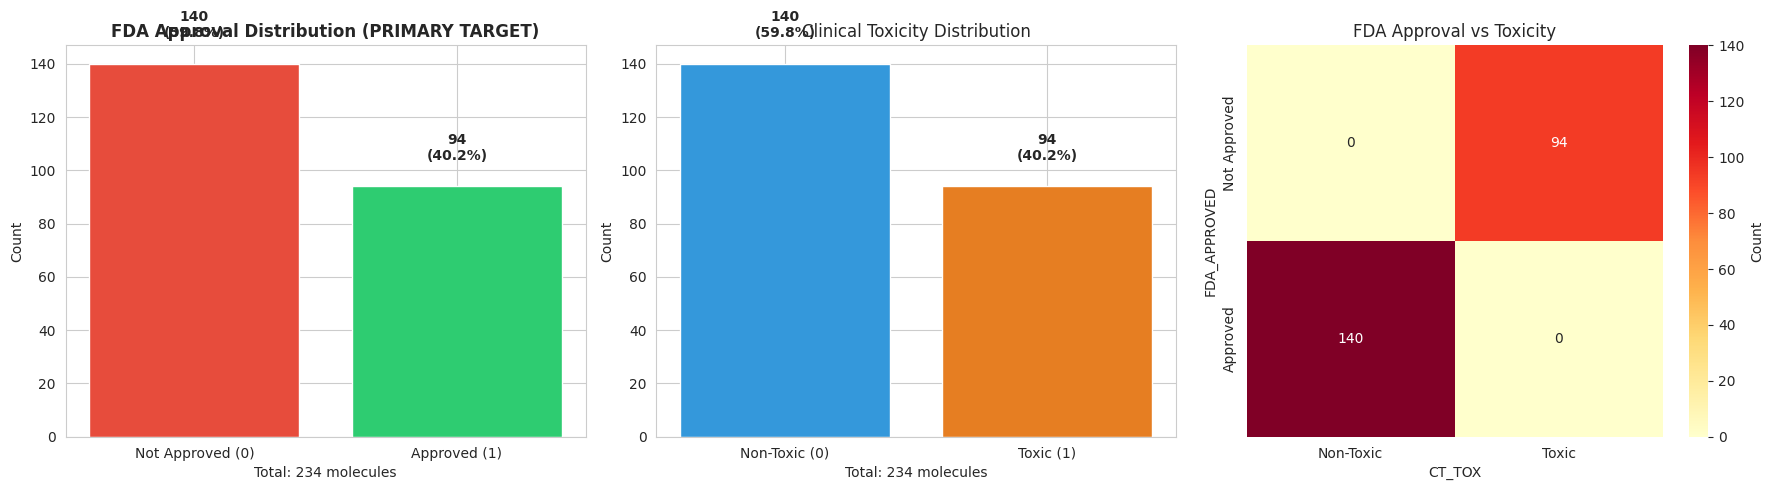

CLASS BALANCE ANALYSIS

FDA_APPROVED (PRIMARY TARGET):
FDA_APPROVED
1    0.598291
0    0.401709
Name: proportion, dtype: float64
Imbalance ratio: 19.66%
Status: BALANCED

CT_TOX:
CT_TOX
0    0.598291
1    0.401709
Name: proportion, dtype: float64
Imbalance ratio: 19.66%
Status: BALANCED

Cross-tabulation:
CT_TOX          0   1  All
FDA_APPROVED              
0               0  94   94
1             140   0  140
All           140  94  234


In [45]:
# Cell 6: Plot distribution of target variables and check balance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# FDA_APPROVED distribution (PRIMARY TARGET)
fda_counts = df_labeled['FDA_APPROVED'].value_counts()
axes[0].bar(['Not Approved (0)', 'Approved (1)'], fda_counts.values, color=['#e74c3c', '#2ecc71'])
axes[0].set_ylabel('Count')
axes[0].set_title('FDA Approval Distribution (PRIMARY TARGET)', fontweight='bold')
axes[0].set_xlabel(f'Total: {len(df_labeled)} molecules')
for i, v in enumerate(fda_counts.values):
    axes[0].text(i, v + 10, f'{v}\n({v/len(df_labeled)*100:.1f}%)', ha='center', fontweight='bold')

# CT_TOX distribution
tox_counts = df_labeled['CT_TOX'].value_counts()
axes[1].bar(['Non-Toxic (0)', 'Toxic (1)'], tox_counts.values, color=['#3498db', '#e67e22'])
axes[1].set_ylabel('Count')
axes[1].set_title('Clinical Toxicity Distribution')
axes[1].set_xlabel(f'Total: {len(df_labeled)} molecules')
for i, v in enumerate(tox_counts.values):
    axes[1].text(i, v + 10, f'{v}\n({v/len(df_labeled)*100:.1f}%)', ha='center', fontweight='bold')

# Cross-tabulation
cross_tab = pd.crosstab(df_labeled['FDA_APPROVED'], df_labeled['CT_TOX'], margins=True)
sns.heatmap(cross_tab.iloc[:-1, :-1], annot=True, fmt='d', cmap='YlOrRd', ax=axes[2], cbar_kws={'label': 'Count'})
axes[2].set_xlabel('CT_TOX')
axes[2].set_ylabel('FDA_APPROVED')
axes[2].set_title('FDA Approval vs Toxicity')
axes[2].set_xticklabels(['Non-Toxic', 'Toxic'])
axes[2].set_yticklabels(['Not Approved', 'Approved'])

plt.tight_layout()
plt.show()

# Balance Analysis
print("="*80)
print("CLASS BALANCE ANALYSIS")
print("="*80)
print("\nFDA_APPROVED (PRIMARY TARGET):")
print(df_labeled['FDA_APPROVED'].value_counts(normalize=True))
imbalance_fda = abs(fda_counts[0] - fda_counts[1]) / fda_counts.sum()
print(f"Imbalance ratio: {imbalance_fda:.2%}")
print(f"Status: {'IMBALANCED' if imbalance_fda > 0.3 else 'BALANCED'}")

print("\nCT_TOX:")
print(df_labeled['CT_TOX'].value_counts(normalize=True))
imbalance_tox = abs(tox_counts[0] - tox_counts[1]) / tox_counts.sum()
print(f"Imbalance ratio: {imbalance_tox:.2%}")
print(f"Status: {'IMBALANCED' if imbalance_tox > 0.3 else 'BALANCED'}")

print("\nCross-tabulation:")
print(cross_tab)

CORRELATION ANALYSIS - FDA_APPROVED (PRIMARY TARGET)

🎯 Top 15 features correlated with FDA_APPROVED:
BalabanJ                   0.387721
HallKierAlpha              0.379924
FractionCsp3               0.260450
QED                        0.186994
NumSaturatedCarbocycles    0.170317
fr_furan                   0.077776
fr_COO                     0.010622
NumSaturatedRings          0.006839
NumAliphaticRings         -0.034047
NumRotatableBonds         -0.037288
PEOE_VSA1                 -0.064825
fr_NH2                    -0.069680
fr_halogen                -0.070668
NumHDonors                -0.115822
Kappa2                    -0.134022
Name: FDA_APPROVED, dtype: float64

Top 10 features correlated with CT_TOX:
NumAromaticHeterocycles    0.356195
NumAromaticRings           0.342217
BertzCT                    0.333874
NumHAcceptors              0.276135
NumRings                   0.273438
NumHeteroatoms             0.268229
PEOE_VSA2                  0.255483
MaxPartialCharge           0.2

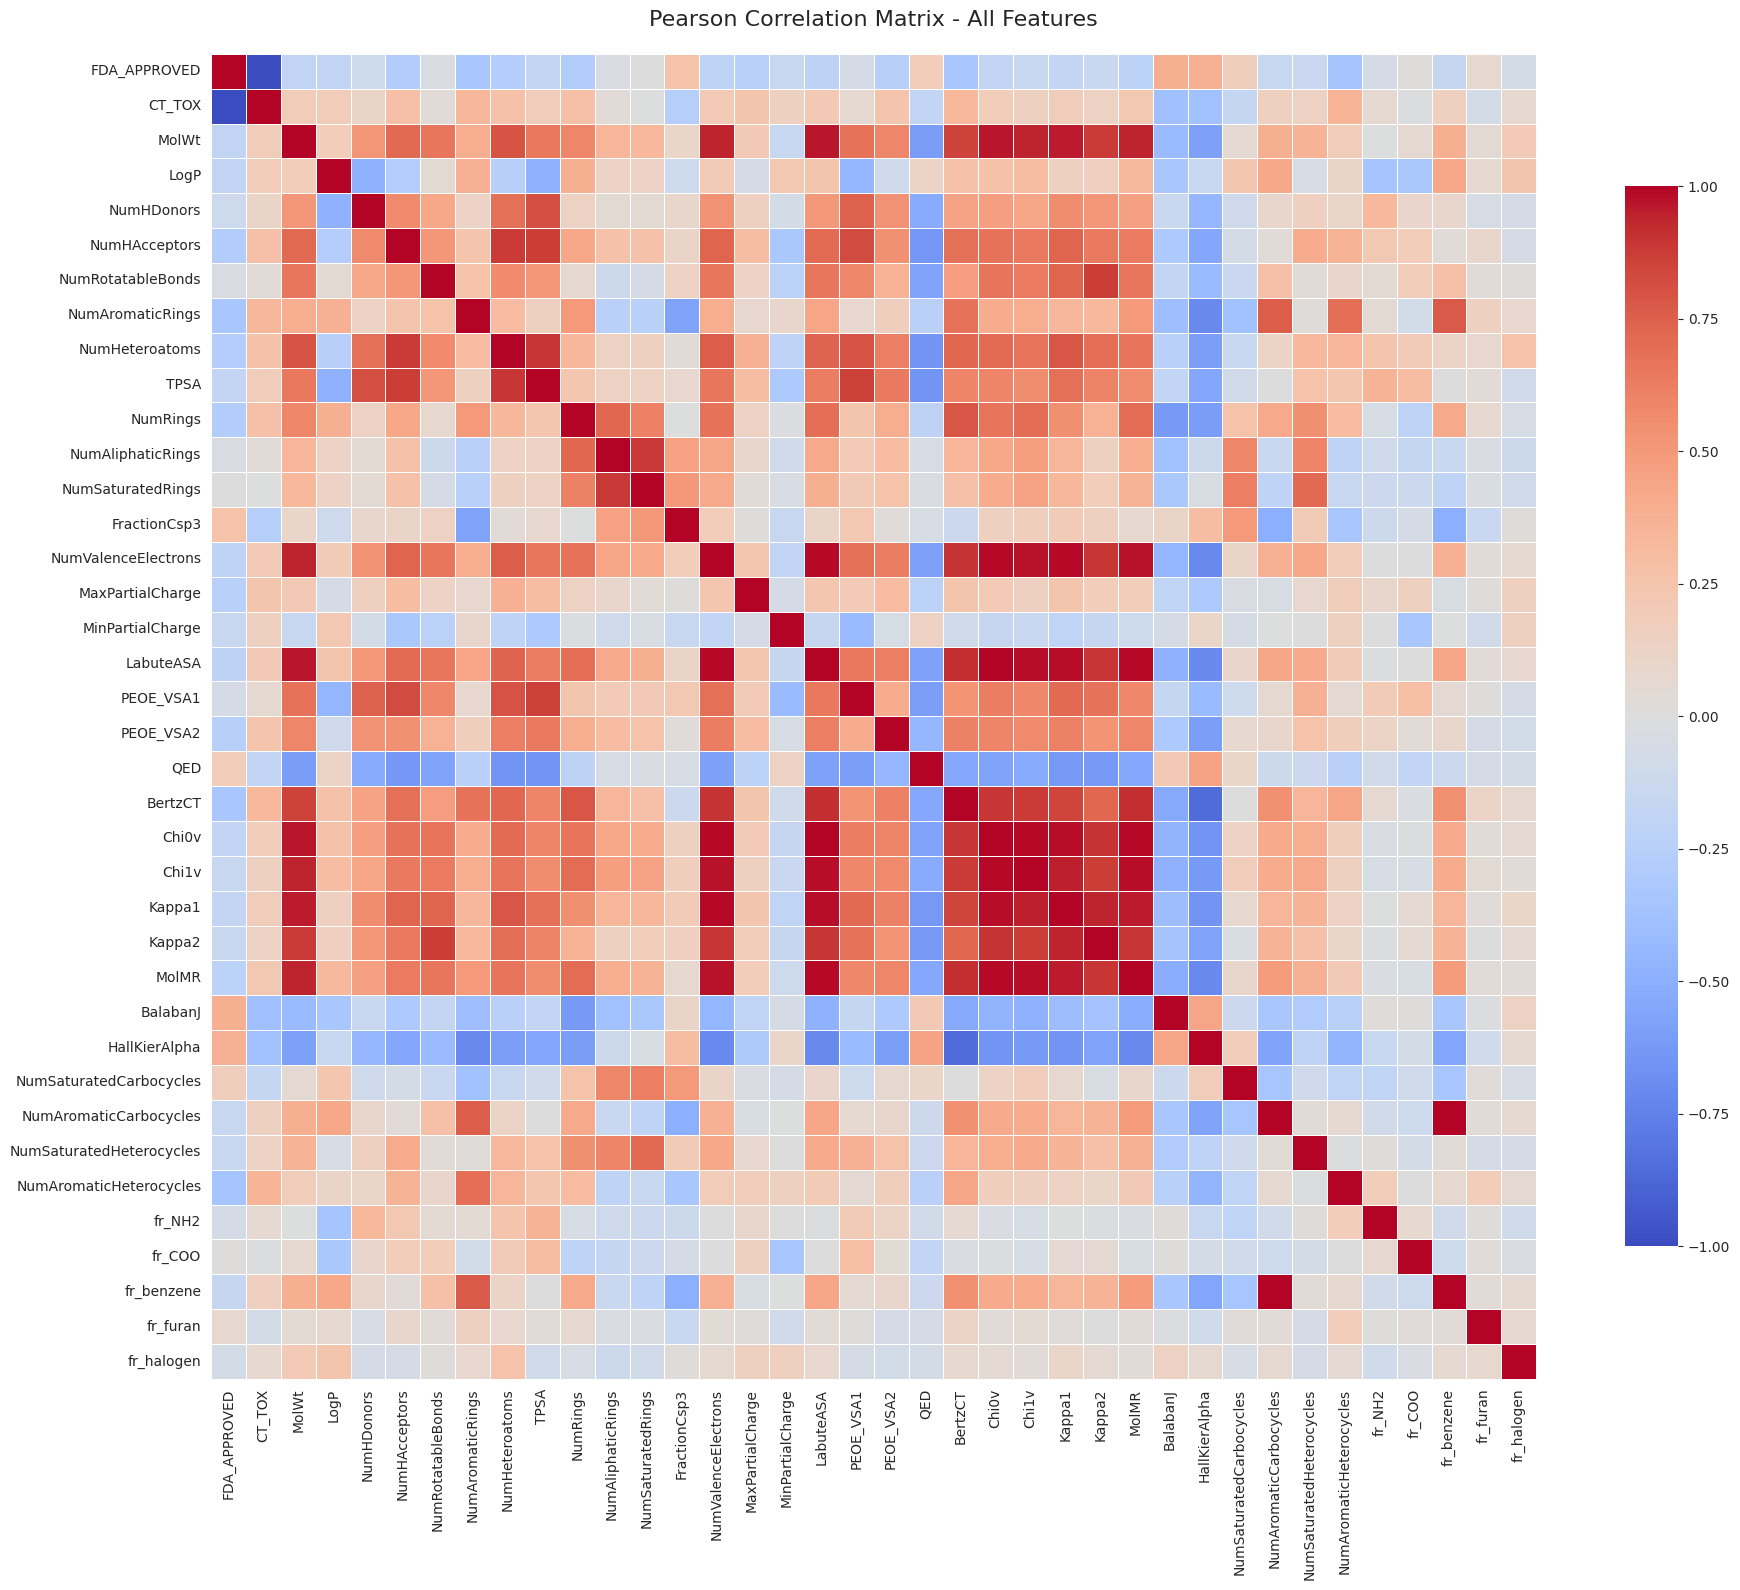

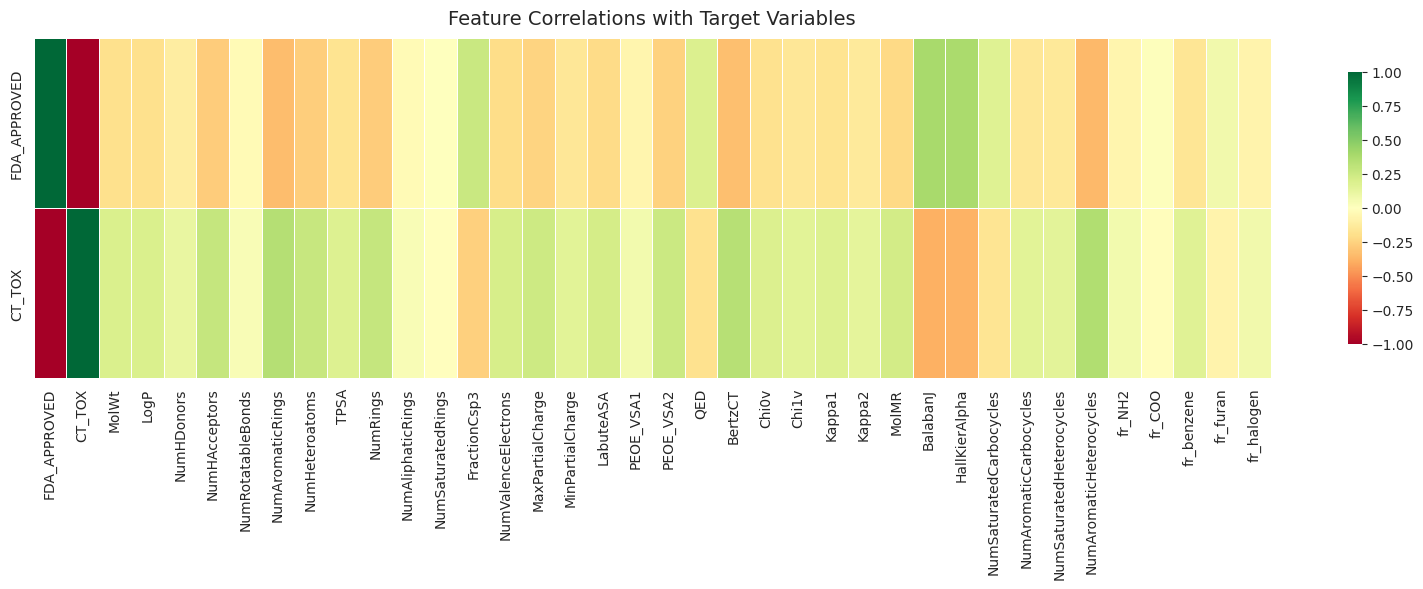

In [46]:
# Cell 7: Correlation analysis - Focus on FDA_APPROVED
print("="*80)
print("CORRELATION ANALYSIS - FDA_APPROVED (PRIMARY TARGET)")
print("="*80)

# Drop non-numeric columns (SMILES strings) before computing correlation
df_numeric = df_labeled.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Correlations with target variables
target_corr_fda = correlation_matrix['FDA_APPROVED'].sort_values(ascending=False)
target_corr_tox = correlation_matrix['CT_TOX'].sort_values(ascending=False)

print("\n🎯 Top 15 features correlated with FDA_APPROVED:")
print(target_corr_fda[1:16])  # Exclude self-correlation

print("\nTop 10 features correlated with CT_TOX:")
print(target_corr_tox[1:11])

# Find highly correlated feature pairs (>0.5, excluding targets)
feature_cols = [col for col in df_numeric.columns if col not in ['FDA_APPROVED', 'CT_TOX']]
high_corr_pairs = []

for i in range(len(feature_cols)):
    for j in range(i+1, len(feature_cols)):
        corr_val = correlation_matrix.loc[feature_cols[i], feature_cols[j]]
        if abs(corr_val) > 0.5:
            high_corr_pairs.append((feature_cols[i], feature_cols[j], corr_val))

print(f"\n{'='*80}")
print(f"HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.5): {len(high_corr_pairs)} pairs found")
print(f"{'='*80}")
if len(high_corr_pairs) > 0:
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:20]:
        print(f"{feat1:30s} <-> {feat2:30s} : {corr:6.3f}")

# Visualize correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            xticklabels=True, yticklabels=True)
plt.title('Pearson Correlation Matrix - All Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Focused heatmap: Targets vs Features
plt.figure(figsize=(16, 6))
target_corr_matrix = correlation_matrix[['FDA_APPROVED', 'CT_TOX']].T
sns.heatmap(target_corr_matrix, cmap='RdYlGn', center=0, annot=False, 
            cbar_kws={"shrink": 0.8}, linewidths=0.5)
plt.title('Feature Correlations with Target Variables', fontsize=14, pad=10)
plt.tight_layout()
plt.show()

## Unlabeled Data

In [47]:
# Cell 8: Load unlabeled data for comparison
print("="*80)
print("LOADING UNLABELED DATA")
print("="*80)

df_unlabeled = pd.read_csv('../../data/raw/enhanced_data/drug_discovery/unlabeled_features.csv')
print(f"✓ Unlabeled dataset loaded successfully!")
print(f"Shape: {df_unlabeled.shape}")
print(f"\nFirst few rows:")
df_unlabeled.head()

LOADING UNLABELED DATA
✓ Unlabeled dataset loaded successfully!
Shape: (249453, 40)

First few rows:


,smiles,canonical_smiles,MolWt,LogP,NumHDonors,NumHAcceptors,NumRotatableBonds,NumAromaticRings,NumHeteroatoms,TPSA,...,NumAromaticCarbocycles,NumSaturatedHeterocycles,NumAromaticHeterocycles,fr_NH2,fr_COO,fr_benzene,fr_furan,fr_halogen,FDA_APPROVED,CT_TOX
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,325.383,5.05060,1.0,2.0,3.0,3.0,4.0,42.24,...,2.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,NaN,NaN
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,285.395,3.11370,1.0,5.0,3.0,2.0,5.0,55.63,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,382.463,4.96778,0.0,3.0,5.0,3.0,4.0,53.33,...,3.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,409.530,4.00022,0.0,5.0,4.0,2.0,6.0,64.43,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,413.910,3.60956,1.0,6.0,4.0,1.0,8.0,112.10,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN


In [48]:
# Cell 9: Compare labeled vs unlabeled datasets
print("="*80)
print("LABELED vs UNLABELED DATA COMPARISON")
print("="*80)

print(f"\nLabeled data:   {df_labeled.shape[0]} molecules, {df_labeled.shape[1]} columns")
print(f"Unlabeled data: {df_unlabeled.shape[0]} molecules, {df_unlabeled.shape[1]} columns")

# Check if columns match
labeled_cols = set(df_labeled.columns)
unlabeled_cols = set(df_unlabeled.columns)

common_cols = labeled_cols & unlabeled_cols
only_labeled = labeled_cols - unlabeled_cols
only_unlabeled = unlabeled_cols - labeled_cols

print(f"\nCommon features: {len(common_cols)}")
print(f"Only in labeled: {only_labeled}")
print(f"Only in unlabeled: {only_unlabeled}")

# Check for missing values in unlabeled data
print("\n" + "="*80)
print("MISSING VALUES IN UNLABELED DATA")
print("="*80)

missing_unlabeled = df_unlabeled.isnull().sum()
missing_unlabeled_df = pd.DataFrame({
    'Missing_Count': missing_unlabeled,
    'Percentage': (missing_unlabeled / len(df_unlabeled)) * 100
})
missing_unlabeled_df = missing_unlabeled_df[missing_unlabeled_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_unlabeled_df) > 0:
    print(missing_unlabeled_df)
else:
    print("✓ No missing values in feature columns!")

LABELED vs UNLABELED DATA COMPARISON

Labeled data:   234 molecules, 40 columns
Unlabeled data: 249453 molecules, 40 columns

Common features: 40
Only in labeled: set()
Only in unlabeled: set()

MISSING VALUES IN UNLABELED DATA
              Missing_Count  Percentage
FDA_APPROVED         249453       100.0
CT_TOX               249453       100.0


In [49]:
# Cell 10: Compare feature distributions between labeled and unlabeled data
print("="*80)
print("FEATURE DISTRIBUTION COMPARISON")
print("="*80)

# Select key molecular features for comparison
key_features = ['MolWt', 'LogP', 'TPSA', 'NumHDonors', 'NumHAcceptors', 
                'NumRotatableBonds', 'NumAromaticRings', 'QED']

# Drop SMILES columns for statistical comparison
df_labeled_features = df_labeled.drop(columns=['smiles', 'canonical_smiles', 'FDA_APPROVED', 'CT_TOX'], errors='ignore')
df_unlabeled_features = df_unlabeled.drop(columns=['smiles', 'canonical_smiles', 'FDA_APPROVED', 'CT_TOX'], errors='ignore')

print("\nSummary Statistics Comparison:")
print("\n--- LABELED DATA ---")
print(df_labeled_features[key_features].describe().T)
print("\n--- UNLABELED DATA ---")
print(df_unlabeled_features[key_features].describe().T)

FEATURE DISTRIBUTION COMPARISON

Summary Statistics Comparison:

--- LABELED DATA ---
                   count        mean         std        min         25%  \
MolWt              234.0  389.882165  183.177435  75.067000  274.384000   
LogP               234.0    1.814152    2.766741 -11.291400    0.285650   
TPSA               234.0   94.128162   66.410921   0.000000   51.065000   
NumHDonors         234.0    2.230769    2.285932   0.000000    1.000000   
NumHAcceptors      234.0    5.264957    3.324750   0.000000    3.000000   
NumRotatableBonds  234.0    5.581197    4.537378   0.000000    2.000000   
NumAromaticRings   234.0    1.696581    1.238609   0.000000    1.000000   
QED                234.0    0.531181    0.225231   0.010267    0.368319   

                          50%         75%          max  
MolWt              357.443500  465.436250  1285.906000  
LogP                 2.198350    3.667100     8.239600  
TPSA                82.370000  119.385000   495.890000  
NumHDonors

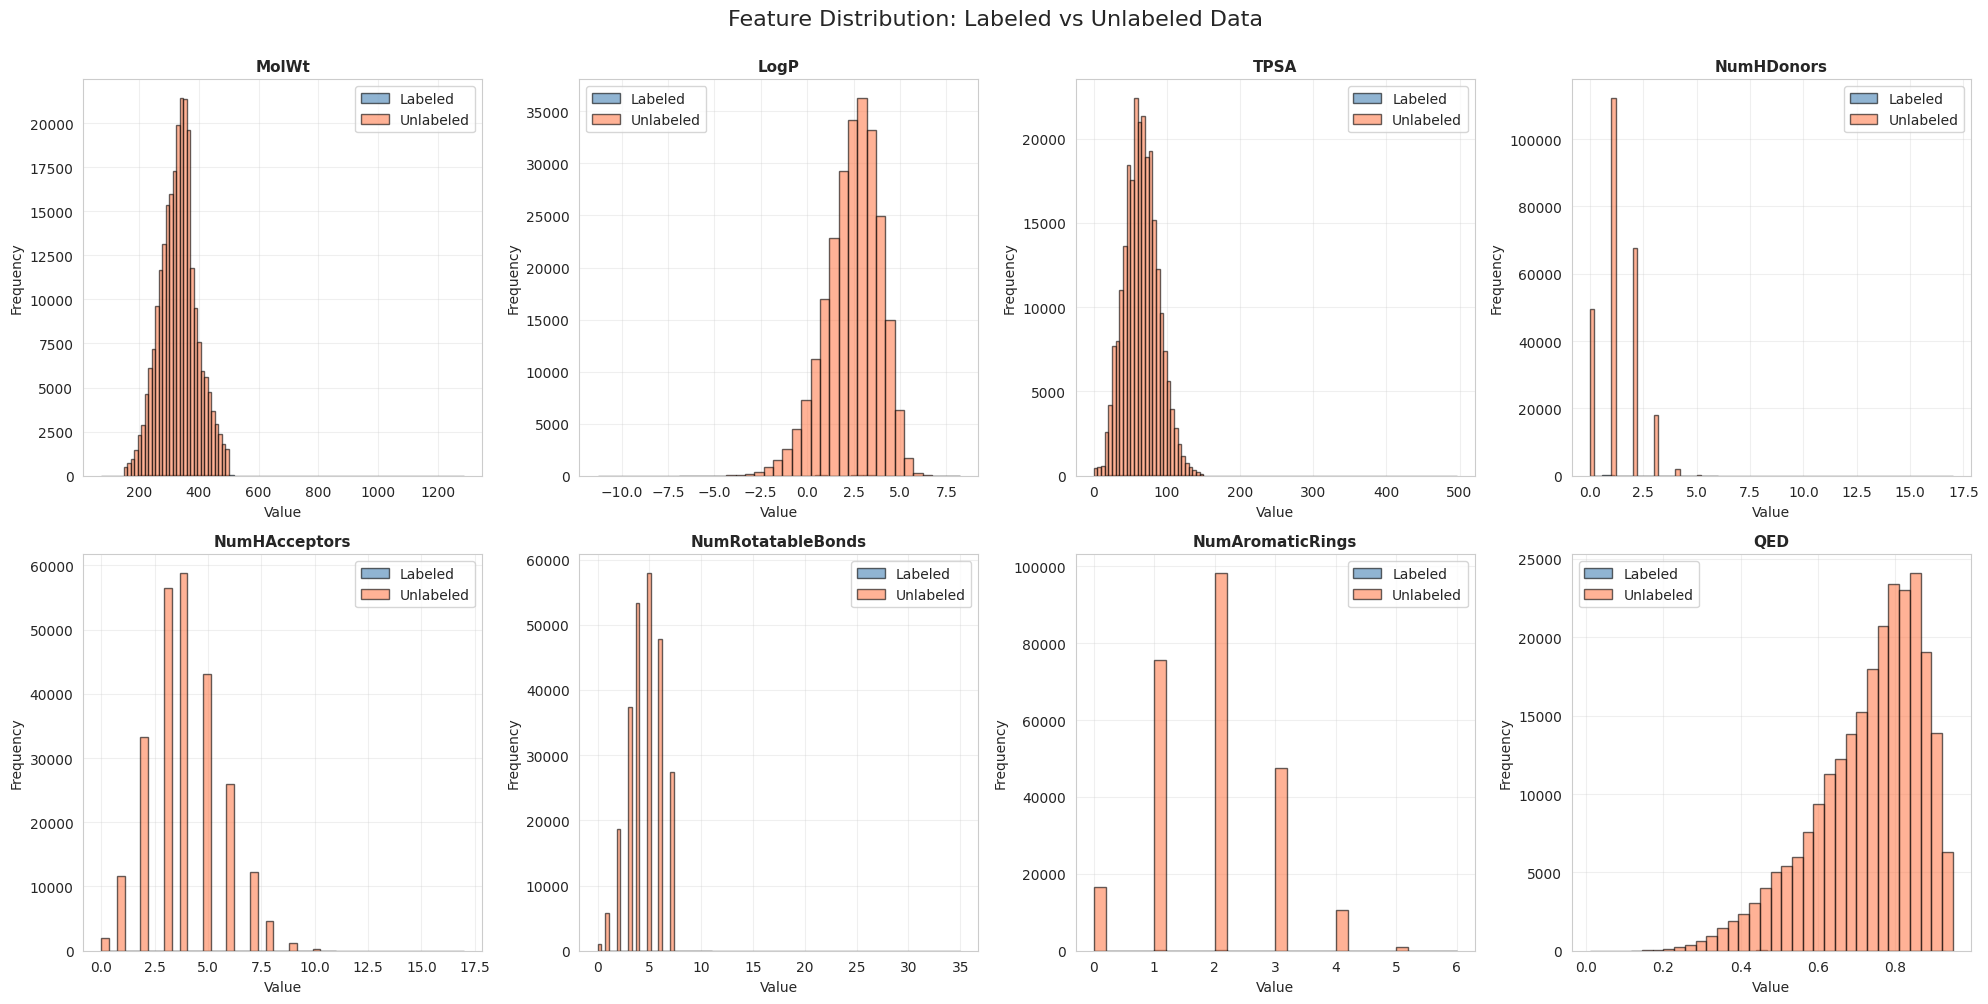

In [50]:
# Cell 11: Visualize distribution comparison for key features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    # Plot both distributions on same axis
    axes[idx].hist(df_labeled[feature], bins=30, alpha=0.6, label='Labeled', color='steelblue', edgecolor='black')
    axes[idx].hist(df_unlabeled[feature], bins=30, alpha=0.6, label='Unlabeled', color='coral', edgecolor='black')
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.suptitle('Feature Distribution: Labeled vs Unlabeled Data', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

In [51]:
# Cell 12: Statistical tests to check if distributions are similar
from scipy.stats import ks_2samp

print("="*80)
print("STATISTICAL COMPARISON (Kolmogorov-Smirnov Test)")
print("="*80)
print("Null Hypothesis: The two distributions are identical")
print("If p-value < 0.05, distributions are significantly different\n")

comparison_results = []

for feature in key_features:
    # Perform KS test
    statistic, p_value = ks_2samp(df_labeled[feature].dropna(), df_unlabeled[feature].dropna())
    
    comparison_results.append({
        'Feature': feature,
        'KS_Statistic': statistic,
        'P_Value': p_value,
        'Significant_Diff': 'YES' if p_value < 0.05 else 'NO'
    })

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("INTERPRETATION:")
print("="*80)
significant_diffs = comparison_df[comparison_df['Significant_Diff'] == 'YES']
if len(significant_diffs) > 0:
    print(f"⚠️ {len(significant_diffs)} features show significant distribution differences")
    print(f"Features: {', '.join(significant_diffs['Feature'].tolist())}")
    print("This may affect model generalization on unlabeled data!")
else:
    print("✓ No significant distribution differences found")
    print("Labeled and unlabeled data come from similar distributions")

STATISTICAL COMPARISON (Kolmogorov-Smirnov Test)
Null Hypothesis: The two distributions are identical
If p-value < 0.05, distributions are significantly different

          Feature  KS_Statistic      P_Value Significant_Diff
            MolWt      0.261935 1.179369e-14              YES
             LogP      0.210031 1.556619e-09              YES
             TPSA      0.317479 1.800418e-21              YES
       NumHDonors      0.231137 1.788323e-11              YES
    NumHAcceptors      0.262707 9.694536e-15              YES
NumRotatableBonds      0.234951 7.607869e-12              YES
 NumAromaticRings      0.108568 7.409160e-03              YES
              QED      0.429950 8.285427e-40              YES

INTERPRETATION:
⚠️ 8 features show significant distribution differences
Features: MolWt, LogP, TPSA, NumHDonors, NumHAcceptors, NumRotatableBonds, NumAromaticRings, QED
This may affect model generalization on unlabeled data!


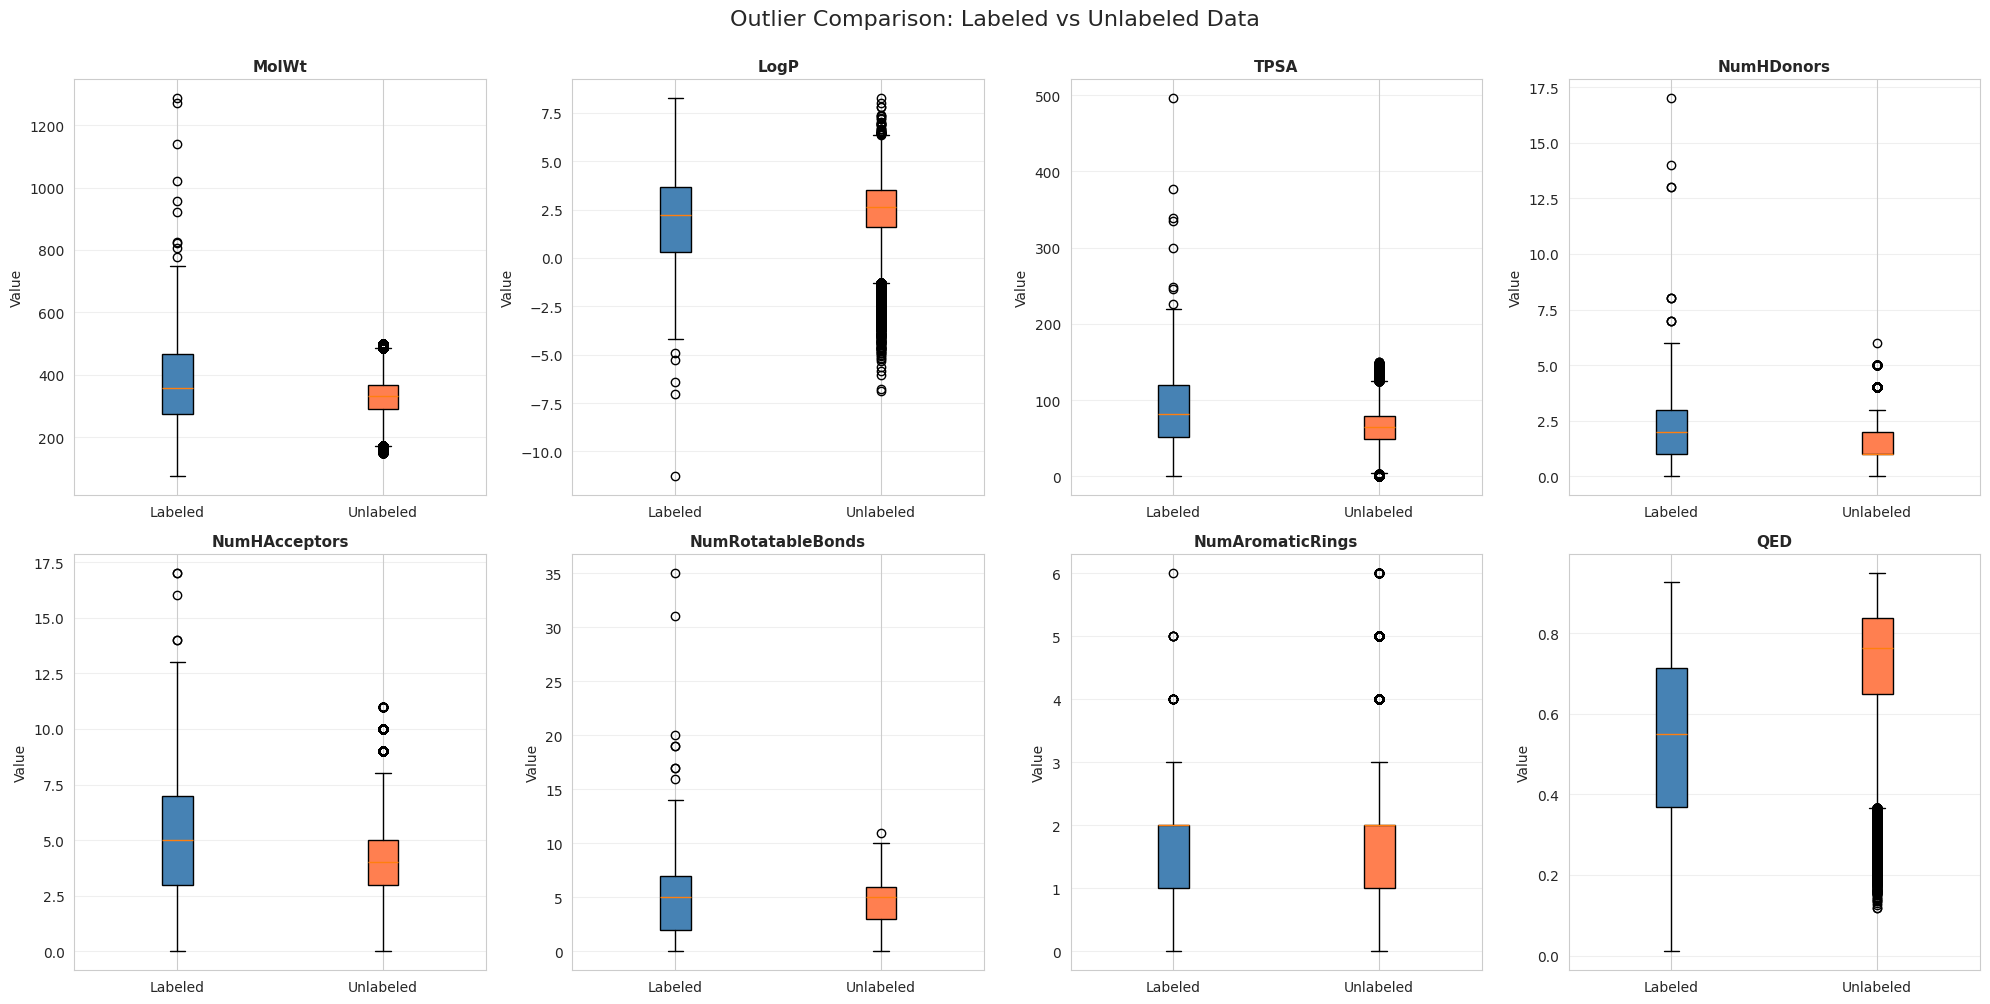

In [52]:
# Cell 13: Box plots for outlier comparison
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    data_to_plot = [df_labeled[feature].dropna(), df_unlabeled[feature].dropna()]
    bp = axes[idx].boxplot(data_to_plot, labels=['Labeled', 'Unlabeled'], patch_artist=True)
    
    # Color the boxes
    bp['boxes'][0].set_facecolor('steelblue')
    bp['boxes'][1].set_facecolor('coral')
    
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(alpha=0.3, axis='y')

plt.suptitle('Outlier Comparison: Labeled vs Unlabeled Data', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

DRUG-LIKENESS COMPARISON - FDA_APPROVED FOCUS

QED (Quantitative Estimate of Drug-likeness):
Labeled   - Mean: 0.531, Std: 0.225
Unlabeled - Mean: 0.732, Std: 0.139

Lipinski's Rule of Five Compliance:
Labeled:   173/234 (73.9%)
Unlabeled: 245429/249453 (98.4%)

🎯 FDA APPROVED vs NOT APPROVED - Drug-likeness Analysis

FDA Approved molecules (n=140):
  • Mean QED: 0.566
  • Mean MolWt: 361.70
  • Mean LogP: 1.37
  • Lipinski compliant: 115/140 (82.1%)

Not FDA Approved molecules (n=94):
  • Mean QED: 0.480
  • Mean MolWt: 431.86
  • Mean LogP: 2.47
  • Lipinski compliant: 58/94 (61.7%)


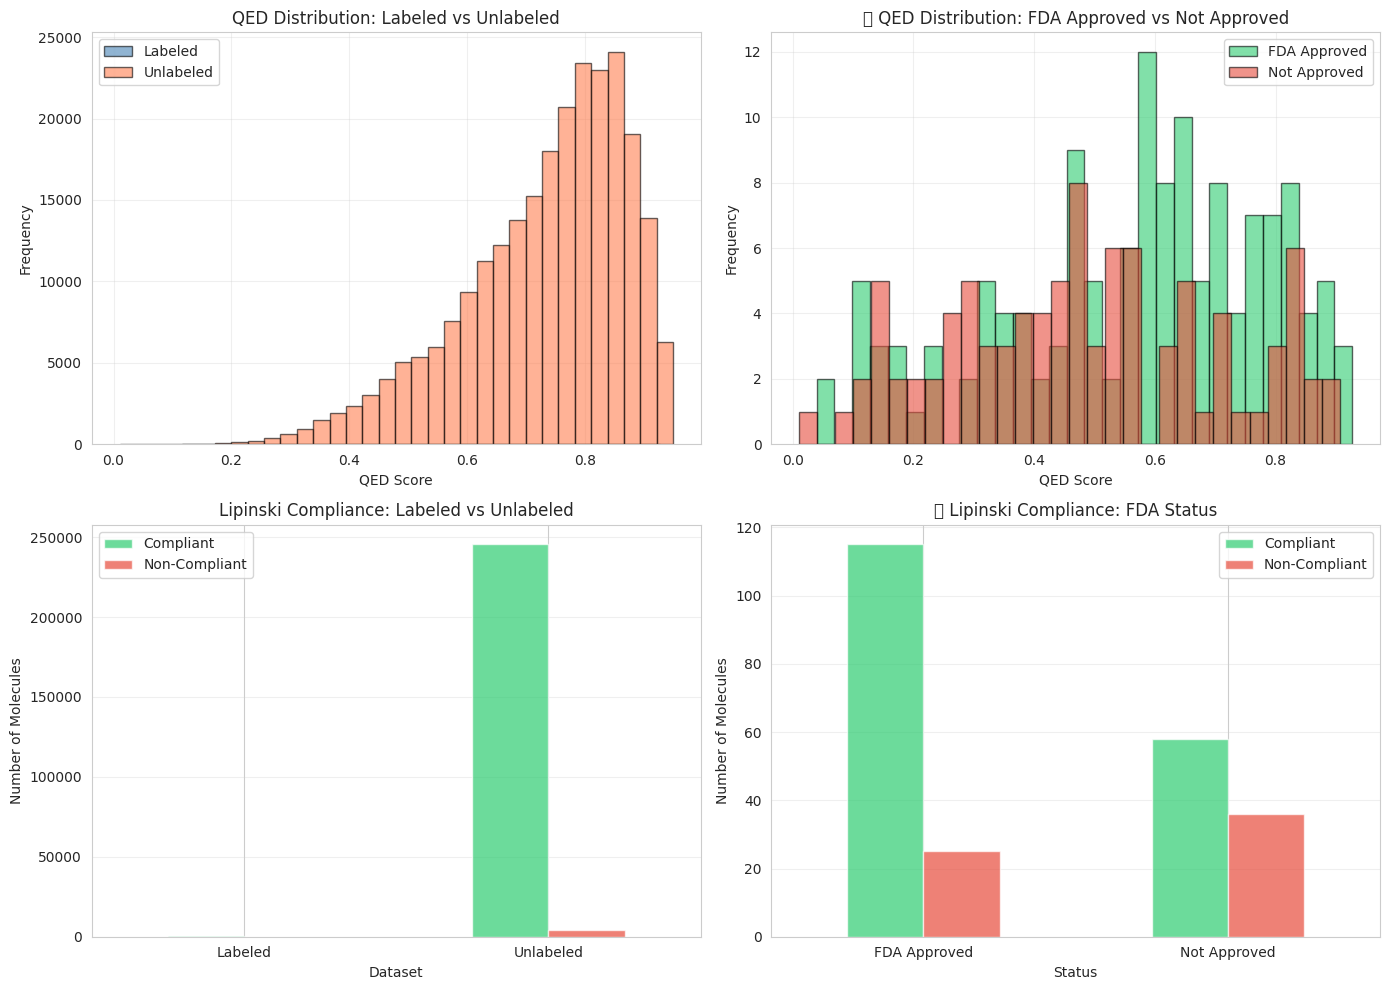

In [53]:
# Cell 14: Drug-likeness comparison with FDA_APPROVED focus
print("="*80)
print("DRUG-LIKENESS COMPARISON - FDA_APPROVED FOCUS")
print("="*80)

# QED Distribution
print("\nQED (Quantitative Estimate of Drug-likeness):")
print(f"Labeled   - Mean: {df_labeled['QED'].mean():.3f}, Std: {df_labeled['QED'].std():.3f}")
print(f"Unlabeled - Mean: {df_unlabeled['QED'].mean():.3f}, Std: {df_unlabeled['QED'].std():.3f}")

# Lipinski's Rule of Five compliance
def check_lipinski(row):
    return (row['MolWt'] <= 500 and 
            row['LogP'] <= 5 and 
            row['NumHDonors'] <= 5 and 
            row['NumHAcceptors'] <= 10)

df_labeled['Lipinski_Compliant'] = df_labeled.apply(check_lipinski, axis=1)
df_unlabeled['Lipinski_Compliant'] = df_unlabeled.apply(check_lipinski, axis=1)

labeled_compliant = df_labeled['Lipinski_Compliant'].sum()
unlabeled_compliant = df_unlabeled['Lipinski_Compliant'].sum()

print(f"\nLipinski's Rule of Five Compliance:")
print(f"Labeled:   {labeled_compliant}/{len(df_labeled)} ({labeled_compliant/len(df_labeled)*100:.1f}%)")
print(f"Unlabeled: {unlabeled_compliant}/{len(df_unlabeled)} ({unlabeled_compliant/len(df_unlabeled)*100:.1f}%)")

# 🎯 Compare FDA approved vs not approved
print("\n" + "="*80)
print("🎯 FDA APPROVED vs NOT APPROVED - Drug-likeness Analysis")
print("="*80)
approved = df_labeled[df_labeled['FDA_APPROVED'] == 1]
not_approved = df_labeled[df_labeled['FDA_APPROVED'] == 0]

print(f"\nFDA Approved molecules (n={len(approved)}):")
print(f"  • Mean QED: {approved['QED'].mean():.3f}")
print(f"  • Mean MolWt: {approved['MolWt'].mean():.2f}")
print(f"  • Mean LogP: {approved['LogP'].mean():.2f}")
print(f"  • Lipinski compliant: {approved['Lipinski_Compliant'].sum()}/{len(approved)} ({approved['Lipinski_Compliant'].sum()/len(approved)*100:.1f}%)")

print(f"\nNot FDA Approved molecules (n={len(not_approved)}):")
print(f"  • Mean QED: {not_approved['QED'].mean():.3f}")
print(f"  • Mean MolWt: {not_approved['MolWt'].mean():.2f}")
print(f"  • Mean LogP: {not_approved['LogP'].mean():.2f}")
print(f"  • Lipinski compliant: {not_approved['Lipinski_Compliant'].sum()}/{len(not_approved)} ({not_approved['Lipinski_Compliant'].sum()/len(not_approved)*100:.1f}%)")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# QED comparison - Labeled vs Unlabeled
axes[0, 0].hist(df_labeled['QED'], bins=30, alpha=0.6, label='Labeled', color='steelblue', edgecolor='black')
axes[0, 0].hist(df_unlabeled['QED'], bins=30, alpha=0.6, label='Unlabeled', color='coral', edgecolor='black')
axes[0, 0].set_xlabel('QED Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('QED Distribution: Labeled vs Unlabeled')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# QED comparison - FDA Approved vs Not Approved
axes[0, 1].hist(approved['QED'], bins=30, alpha=0.6, label='FDA Approved', color='#2ecc71', edgecolor='black')
axes[0, 1].hist(not_approved['QED'], bins=30, alpha=0.6, label='Not Approved', color='#e74c3c', edgecolor='black')
axes[0, 1].set_xlabel('QED Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('🎯 QED Distribution: FDA Approved vs Not Approved')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Lipinski compliance - Labeled vs Unlabeled
lipinski_data = pd.DataFrame({
    'Dataset': ['Labeled', 'Unlabeled'],
    'Compliant': [labeled_compliant, unlabeled_compliant],
    'Non-Compliant': [len(df_labeled) - labeled_compliant, len(df_unlabeled) - unlabeled_compliant]
})
lipinski_data.set_index('Dataset').plot(kind='bar', stacked=False, ax=axes[1, 0], 
                                         color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 0].set_ylabel('Number of Molecules')
axes[1, 0].set_title("Lipinski Compliance: Labeled vs Unlabeled")
axes[1, 0].set_xticklabels(['Labeled', 'Unlabeled'], rotation=0)
axes[1, 0].legend(['Compliant', 'Non-Compliant'])
axes[1, 0].grid(alpha=0.3, axis='y')

# Lipinski compliance - FDA Approved vs Not Approved
fda_lipinski = pd.DataFrame({
    'Status': ['FDA Approved', 'Not Approved'],
    'Compliant': [approved['Lipinski_Compliant'].sum(), not_approved['Lipinski_Compliant'].sum()],
    'Non-Compliant': [len(approved) - approved['Lipinski_Compliant'].sum(), 
                      len(not_approved) - not_approved['Lipinski_Compliant'].sum()]
})
fda_lipinski.set_index('Status').plot(kind='bar', stacked=False, ax=axes[1, 1], 
                                       color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 1].set_ylabel('Number of Molecules')
axes[1, 1].set_title("🎯 Lipinski Compliance: FDA Status")
axes[1, 1].set_xticklabels(['FDA Approved', 'Not Approved'], rotation=0)
axes[1, 1].legend(['Compliant', 'Non-Compliant'])
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [54]:
# Cell 15: Summary statistics comparison table
print("="*80)
print("COMPLETE DATASET SUMMARY - FDA_APPROVED FOCUS")
print("="*80)

summary_stats = pd.DataFrame({
    'Metric': [
        'Total Molecules',
        'Total Features',
        'Missing Values',
        'Mean Molecular Weight',
        'Mean LogP',
        'Mean TPSA',
        'Mean QED',
        'Lipinski Compliant (%)',
        'Mean Aromatic Rings'
    ],
    'Labeled': [
        len(df_labeled),
        len(df_labeled.columns) - 4,  # Exclude smiles, canonical_smiles, and targets
        df_labeled.isnull().sum().sum(),
        f"{df_labeled['MolWt'].mean():.2f}",
        f"{df_labeled['LogP'].mean():.2f}",
        f"{df_labeled['TPSA'].mean():.2f}",
        f"{df_labeled['QED'].mean():.3f}",
        f"{labeled_compliant/len(df_labeled)*100:.1f}%",
        f"{df_labeled['NumAromaticRings'].mean():.2f}"
    ],
    'Unlabeled': [
        len(df_unlabeled),
        len(df_unlabeled.columns) - 4,
        df_unlabeled.isnull().sum().sum(),
        f"{df_unlabeled['MolWt'].mean():.2f}",
        f"{df_unlabeled['LogP'].mean():.2f}",
        f"{df_unlabeled['TPSA'].mean():.2f}",
        f"{df_unlabeled['QED'].mean():.3f}",
        f"{unlabeled_compliant/len(df_unlabeled)*100:.1f}%",
        f"{df_unlabeled['NumAromaticRings'].mean():.2f}"
    ]
})

print(summary_stats.to_string(index=False))

print("\n" + "="*80)
print("🎯 EDA COMPLETED - DRUG DISCOVERY (FDA_APPROVED)")
print("="*80)
print("\nKey Findings:")
print(f"  • Primary Target: FDA_APPROVED")
print(f"  • Labeled molecules: {len(df_labeled)}")
print(f"    - FDA Approved: {(df_labeled['FDA_APPROVED'] == 1).sum()}")
print(f"    - Not Approved: {(df_labeled['FDA_APPROVED'] == 0).sum()}")
print(f"  • Unlabeled molecules: {len(df_unlabeled)}")
print(f"  • Molecular features: {len(df_labeled.columns) - 4}")
print("\nNext step: Data preprocessing for FDA_APPROVED prediction!")

COMPLETE DATASET SUMMARY - FDA_APPROVED FOCUS
                Metric Labeled Unlabeled
       Total Molecules     234    249453
        Total Features      37        37
        Missing Values       0    498906
 Mean Molecular Weight  389.88    332.14
             Mean LogP    1.81      2.46
             Mean TPSA   94.13     64.82
              Mean QED   0.531     0.732
Lipinski Compliant (%)   73.9%     98.4%
   Mean Aromatic Rings    1.70      1.85

🎯 EDA COMPLETED - DRUG DISCOVERY (FDA_APPROVED)

Key Findings:
  • Primary Target: FDA_APPROVED
  • Labeled molecules: 234
    - FDA Approved: 140
    - Not Approved: 94
  • Unlabeled molecules: 249453
  • Molecular features: 37

Next step: Data preprocessing for FDA_APPROVED prediction!


## Data Processing

In [55]:
# Cell 17: Load and prepare data for FDA_APPROVED prediction
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
import json

print("="*80)
print("DATA PREPROCESSING FOR FDA_APPROVED PREDICTION")
print("="*80)

# Load data
df_labeled = pd.read_csv('../../data/raw/enhanced_data/drug_discovery/labeled_features.csv')
df_unlabeled = pd.read_csv('../../data/raw/enhanced_data/drug_discovery/unlabeled_features.csv')

print(f"\nLoaded {len(df_labeled)} labeled molecules")
print(f"Loaded {len(df_unlabeled)} unlabeled molecules")

# Check FDA_APPROVED distribution
print("\n🎯 FDA_APPROVED Distribution:")
print(df_labeled['FDA_APPROVED'].value_counts())
print(f"Balance: {df_labeled['FDA_APPROVED'].value_counts(normalize=True)}")

DATA PREPROCESSING FOR FDA_APPROVED PREDICTION

Loaded 234 labeled molecules
Loaded 249453 unlabeled molecules

🎯 FDA_APPROVED Distribution:
FDA_APPROVED
1    140
0     94
Name: count, dtype: int64
Balance: FDA_APPROVED
1    0.598291
0    0.401709
Name: proportion, dtype: float64


In [56]:
# Cell 18: Feature selection - Keep ALL features
print("\n" + "="*80)
print("STEP 1: FEATURE SELECTION - KEEPING ALL FEATURES")
print("="*80)

# Identify feature columns (exclude identifiers and targets)
exclude_cols = ['smiles', 'canonical_smiles', 'FDA_APPROVED', 'CT_TOX']
all_features = [col for col in df_labeled.columns if col not in exclude_cols]

print(f"Keeping all {len(all_features)} molecular features")

# Apply to both datasets
X_labeled = df_labeled[all_features]
y_fda = df_labeled['FDA_APPROVED']  # 🎯 FDA_APPROVED as target

X_unlabeled = df_unlabeled[all_features]

print(f"\nLabeled data: {X_labeled.shape}")
print(f"Unlabeled data: {X_unlabeled.shape}")
print(f"Target: FDA_APPROVED")


STEP 1: FEATURE SELECTION - KEEPING ALL FEATURES
Keeping all 36 molecular features

Labeled data: (234, 36)
Unlabeled data: (249453, 36)
Target: FDA_APPROVED


In [57]:
# Cell 19: Handle outliers (CLIPPING)
print("\n" + "="*80)
print("STEP 2: HANDLE OUTLIERS (CLIPPING)")
print("="*80)

def clip_outliers(df, std_threshold=3):
    """Clip outliers using standard deviation method"""
    df_clipped = df.copy()
    outlier_count = 0
    
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - std_threshold * std
        upper_bound = mean + std_threshold * std
        
        # Count outliers
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        if outliers > 0:
            outlier_count += outliers
            df_clipped[col] = df[col].clip(lower_bound, upper_bound)
    
    return df_clipped, outlier_count

X_labeled_clipped, labeled_outliers = clip_outliers(X_labeled, std_threshold=3)
X_unlabeled_clipped, unlabeled_outliers = clip_outliers(X_unlabeled, std_threshold=3)

print(f"✓ Total outliers clipped:")
print(f"  Labeled: {labeled_outliers}")
print(f"  Unlabeled: {unlabeled_outliers}")


STEP 2: HANDLE OUTLIERS (CLIPPING)
✓ Total outliers clipped:
  Labeled: 157
  Unlabeled: 62174


In [58]:
# Cell 20: Normalize features using StandardScaler
print("\n" + "="*80)
print("STEP 3: Z-SCORE NORMALIZATION")
print("="*80)

# Fit scaler on labeled data only
scaler = StandardScaler()
scaler.fit(X_labeled_clipped)

# Transform both datasets
X_labeled_scaled = scaler.transform(X_labeled_clipped)
X_unlabeled_scaled = scaler.transform(X_unlabeled_clipped)

# Convert back to DataFrame
X_labeled_scaled_df = pd.DataFrame(
    X_labeled_scaled, 
    columns=X_labeled_clipped.columns,
    index=X_labeled_clipped.index
)

X_unlabeled_scaled_df = pd.DataFrame(
    X_unlabeled_scaled, 
    columns=X_unlabeled_clipped.columns,
    index=X_unlabeled_clipped.index
)

print(f"✓ Normalization completed")
print(f"\nScaled labeled data shape: {X_labeled_scaled_df.shape}")
print(f"Scaled unlabeled data shape: {X_unlabeled_scaled_df.shape}")


STEP 3: Z-SCORE NORMALIZATION
✓ Normalization completed

Scaled labeled data shape: (234, 36)
Scaled unlabeled data shape: (249453, 36)


In [59]:
# Cell 21: Add target back to labeled data
print("\n" + "="*80)
print("STEP 4: COMBINE FEATURES WITH TARGET (FDA_APPROVED)")
print("="*80)

# Add FDA_APPROVED target
df_labeled_processed = X_labeled_scaled_df.copy()
df_labeled_processed['FDA_APPROVED'] = y_fda.values

df_unlabeled_processed = X_unlabeled_scaled_df.copy()
df_unlabeled_processed['FDA_APPROVED'] = np.nan

print(f"Labeled processed: {df_labeled_processed.shape}")
print(f"Unlabeled processed: {df_unlabeled_processed.shape}")

# Display sample
print("\nSample of processed labeled data:")
print(df_labeled_processed.head())
print(f"\n🎯 Target distribution:")
print(df_labeled_processed['FDA_APPROVED'].value_counts())


STEP 4: COMBINE FEATURES WITH TARGET (FDA_APPROVED)
Labeled processed: (234, 37)
Unlabeled processed: (249453, 37)

Sample of processed labeled data:
      MolWt      LogP  NumHDonors  NumHAcceptors  NumRotatableBonds  \
0 -0.056162 -1.332390    1.530898       1.152160          -0.116728   
1 -0.176039  0.494900   -0.612121      -0.075716           0.391070   
2  0.178825  0.002525   -0.076366       0.538222          -0.116728   
3  3.331845 -1.034352    3.721367       3.067402           2.168363   
4 -0.290127  0.330251   -0.612121      -1.303592           0.137171   

   NumAromaticRings  NumHeteroatoms      TPSA  NumRings  NumAliphaticRings  \
0         -0.565303        0.652294  1.163728 -0.018056           0.451472   
1          0.249173       -0.328719 -0.408116 -0.018056          -0.225801   
2          0.249173        0.407041  0.296661  0.575932           0.451472   
3          1.878124        3.238572  3.384920  2.357895           1.128745   
4          0.249173       -1.064

In [60]:
# Cell 22: Save processed data
print("\n" + "="*80)
print("STEP 5: SAVE PROCESSED DATA")
print("="*80)

# Save processed datasets to drug_discovery folder
df_labeled_processed.to_csv('../../data/processed/drug_discovery/labeled_processed.csv', index=False)
df_unlabeled_processed.to_csv('../../data/processed/drug_discovery/unlabeled_processed.csv', index=False)

# Save scaler for later use
joblib.dump(scaler, '../../data/processed/drug_discovery/scaler.pkl')

# Save feature information
feature_info = {
    'feature_names': all_features,
    'n_features': len(all_features),
    'target_variable': 'FDA_APPROVED',
    'project': 'drug_discovery',
    'selection_method': 'all_features_included',
    'scaling_method': 'StandardScaler',
    'outlier_handling': 'clipping_3std',
    'feature_categories': {
        'basic_properties': ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'NumAromaticRings'],
        'lipinski': ['NumHeteroatoms', 'TPSA'],
        'structural': ['NumRings', 'NumAliphaticRings', 'NumSaturatedRings', 'FractionCsp3'],
        'topological': ['BertzCT', 'Chi0v', 'Chi1v', 'Kappa1', 'Kappa2', 'BalabanJ', 'HallKierAlpha'],
        'electronic': ['NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge'],
        'surface': ['LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2'],
        'druglikeness': ['QED', 'MolMR'],
        'pharmacophore': ['fr_NH2', 'fr_COO', 'fr_benzene', 'fr_furan', 'fr_halogen'],
        'carbocycles': ['NumSaturatedCarbocycles', 'NumAromaticCarbocycles'],
        'heterocycles': ['NumSaturatedHeterocycles', 'NumAromaticHeterocycles']
    }
}

with open('../../data/processed/drug_discovery/feature_info.json', 'w') as f:
    json.dump(feature_info, f, indent=2)

print("✓ Saved: labeled_processed.csv")
print("✓ Saved: unlabeled_processed.csv")
print("✓ Saved: scaler.pkl")
print("✓ Saved: feature_info.json")

print("\n" + "="*80)
print("🎯 DATA PREPROCESSING COMPLETED - FDA_APPROVED")
print("="*80)
print(f"\nFinal dataset ready for semi-supervised learning:")
print(f"  • {len(df_labeled_processed)} labeled molecules")
print(f"    - FDA Approved: {(df_labeled_processed['FDA_APPROVED'] == 1).sum()}")
print(f"    - Not Approved: {(df_labeled_processed['FDA_APPROVED'] == 0).sum()}")
print(f"  • {len(df_unlabeled_processed)} unlabeled molecules")
print(f"  • {len(all_features)} molecular features")
print(f"  • Target variable: FDA_APPROVED")
print(f"\nFiles saved to: data/processed/drug_discovery/")
print(f"\nNext step: Train semi-supervised models for FDA approval prediction!")


STEP 5: SAVE PROCESSED DATA
✓ Saved: labeled_processed.csv
✓ Saved: unlabeled_processed.csv
✓ Saved: scaler.pkl
✓ Saved: feature_info.json

🎯 DATA PREPROCESSING COMPLETED - FDA_APPROVED

Final dataset ready for semi-supervised learning:
  • 234 labeled molecules
    - FDA Approved: 140
    - Not Approved: 94
  • 249453 unlabeled molecules
  • 36 molecular features
  • Target variable: FDA_APPROVED

Files saved to: data/processed/drug_discovery/

Next step: Train semi-supervised models for FDA approval prediction!
